In [1]:
from sklearn import datasets
data_breast_cancer = datasets.load_breast_cancer(as_frame = True)
print(data_breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

<Axes: xlabel='x', ylabel='y'>

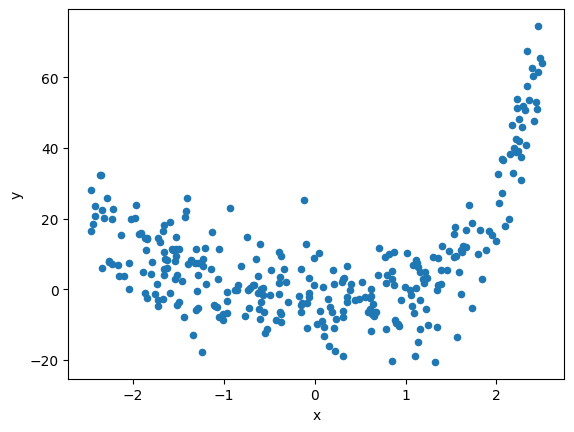

In [2]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4,w3,w2,w1,w0 = 1,2,1,-4,2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_breast_cancer['data'][['mean texture', 'mean symmetry']],
                                                    data_breast_cancer['target'],
                                                    test_size=0.2, 
                                                    random_state=42)

In [4]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error
from sklearn.tree import export_graphviz
import graphviz
import os



tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

y_train_pred = tree_clf.predict(X_train)
f1_train = f1_score(y_train, y_train_pred)
    
y_test_pred = tree_clf.predict(X_test)
f1_test = f1_score(y_test, y_test_pred)


In [5]:
import pickle
list = [3, f1_train, f1_test, accuracy_score(y_train, tree_clf.predict(X_train)), accuracy_score(y_test, tree_clf.predict(X_test))]
print(list)
with open('f1acc_tree.pkl', 'wb') as f:
    pickle.dump(list, f)

[3, 0.8211243611584327, 0.7887323943661971, 0.7692307692307693, 0.7368421052631579]


In [6]:
export_graphviz(tree_clf, out_file="tree.dot", 
                filled=True, feature_names=['mean texture', 'mean symmetry'], 
                class_names=['malignant', 'benign'])

# Render the DOT file to a PNG image
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render('bc', format='png')

'bc.png'

In [7]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,
                                                    y,
                                                    test_size=0.2, 
                                                    random_state=42)

In [8]:



# Próba różnych głębokości drzewa
for depth in range(1, 20):
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_reg.fit(X_train2.reshape(-1,1), y_train2)
    
    #print(depth)
    #print(mean_squared_error(y_train2, tree_reg.predict(X_train2.reshape(-1,1))))
    #print(mean_squared_error(y_test2, tree_reg.predict(X_test2.reshape(-1,1))))

tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X_train2.reshape(-1,1), y_train2)

DecisionTreeRegressor(max_depth=4, random_state=42)

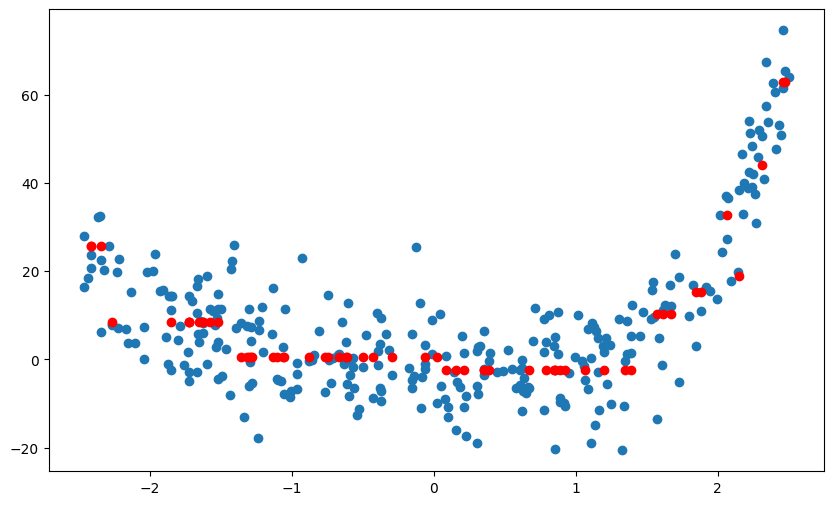

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.scatter(X_test2, tree_reg.predict(X_test2.reshape(-1,1)), color='red')
plt.show()



In [10]:
export_graphviz(tree_reg, out_file="tree_reg.dot", 
                filled=True)

with open("tree_reg.dot") as f:
    dot_graph2 = f.read()
graphviz.Source(dot_graph2).render('reg', format='png')

'reg.png'

In [11]:
list2 = [4, mean_squared_error(y_train2, tree_reg.predict(X_train2.reshape(-1,1))), mean_squared_error(y_test2, tree_reg.predict(X_test2.reshape(-1,1)))]

In [12]:
print(list2)

[4, 55.20588511017878, 71.59334801954297]


In [13]:
with open('mse_tree.pkl', 'wb') as f:
    pickle.dump(list2, f)